# FIT1043 Introduction to Data Science
Assignment 1

Name: Tan Yoong Kiat

Student ID: 32142773

# Introduction 

This whole pandemic is the first ever "event" that affecting the whole world, without any exception towards any country.In this pandemic, countries in this world have came out with solutions to encounter with this problem. Most of them chose to lock down the country border, and even affected city. However, with all this action the pandemic is still not solved at this moment, with 1.2Billons of confirmed cases and 2.7Millons of death. The only ways to encounter with this pandemic is vaccinations. Hence, the pharmaceutical companies is working on the vaccines to 'destroy' this pandemic. Hence, this assignment is mainly about the vaccinations status of South East Asia countries.

# Importing Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
plt.style.use('seaborn-darkgrid')
%matplotlib inline

# List for SEA country name

In [2]:
sea_name = ['Brunei Darussalam' , 'Cambodia','Timor-Leste', 'Indonesia', 'Malaysia', #assigning a list for SEA country name 
            'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam', 'Lao PDR']
sea_name

['Brunei Darussalam',
 'Cambodia',
 'Timor-Leste',
 'Indonesia',
 'Malaysia',
 'Myanmar',
 'Philippines',
 'Singapore',
 'Thailand',
 'Vietnam',
 'Lao PDR']

# Reading The Vaccine CSV files

In [3]:
#Reading the Vaccine CSV files by using the columns wanted with 
#usecols[] parameter then filtering the column 'country' with the sea_name list by isin()

vaccine = pd.read_csv("Vaccinations.csv", usecols = ["country","vaccines","daily_vaccinations", "people_fully_vaccinated"])
vaccine = vaccine[vaccine['country'].isin(sea_name)]
vaccine.head()

,country,people_fully_vaccinated,daily_vaccinations,vaccines
606,Cambodia,NaN,NaN,Sinopharm/Beijing
607,Cambodia,NaN,1492.0,Sinopharm/Beijing
608,Cambodia,NaN,871.0,Sinopharm/Beijing
609,Cambodia,NaN,663.0,Sinopharm/Beijing
610,Cambodia,NaN,560.0,Sinopharm/Beijing


In [4]:
# Rename the column to a more appropiate name and reset the index
vaccine = vaccine.reset_index()
vaccine.rename(
    columns = {
        'vaccines':'Vaccines',
        'country' : 'Country',
        'daily_vaccinations':'Total_vaccinations',
        'people_fully_vaccinated':'People_fully_vaccinated',
        },
    inplace = True
)
vaccine.head()

,index,Country,People_fully_vaccinated,Total_vaccinations,Vaccines
0,606,Cambodia,NaN,NaN,Sinopharm/Beijing
1,607,Cambodia,NaN,1492.0,Sinopharm/Beijing
2,608,Cambodia,NaN,871.0,Sinopharm/Beijing
3,609,Cambodia,NaN,663.0,Sinopharm/Beijing
4,610,Cambodia,NaN,560.0,Sinopharm/Beijing


In [5]:
# drop the index column on the previous dataframe
vaccine = vaccine.drop('index',axis=1)
vaccine.head()

,Country,People_fully_vaccinated,Total_vaccinations,Vaccines
0,Cambodia,NaN,NaN,Sinopharm/Beijing
1,Cambodia,NaN,1492.0,Sinopharm/Beijing
2,Cambodia,NaN,871.0,Sinopharm/Beijing
3,Cambodia,NaN,663.0,Sinopharm/Beijing
4,Cambodia,NaN,560.0,Sinopharm/Beijing


In [6]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
Country                    106 non-null object
People_fully_vaccinated    29 non-null float64
Total_vaccinations         102 non-null float64
Vaccines                   106 non-null object
dtypes: float64(2), object(2)
memory usage: 3.4+ KB


# Performing some Operation on the vaccine dataframe and output finalise

In [7]:
# Perform sum operation on Total_Vaccinations to get the figure on total number had been vaccinated
# Perform max operation on People_fully_vaccinated to get the up-to-date data (cumulative)


fun = {'Total_vaccinations':'sum' , 'People_fully_vaccinated' : "max"}
vaccine = vaccine.groupby(['Country','Vaccines']).agg(fun)
vaccine = vaccine.reset_index()

# FINAL Vaccine dataframe

In [8]:
vaccine

,Country,Vaccines,Total_vaccinations,People_fully_vaccinated
0,Cambodia,Sinopharm/Beijing,8171.0,NaN
1,Indonesia,Sinovac,2022788.0,825650.0
2,Myanmar,Oxford/AstraZeneca,82823.0,NaN
3,Singapore,Pfizer/BioNTech,329630.0,110000.0


# GDP CSV FILE

In [9]:
#1. index_col = 0 to tell the jupyter not to read the default index from the CSV files 

#2. skiprows = 4 to skip the first 4 unwanted rows

gdp = pd.read_csv("2019-GDP.csv",index_col=0,skiprows=4)
gdp.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
USA,1,NaN,United States,"21,427,700",NaN
CHN,2,NaN,China,"14,342,903",NaN
JPN,3,NaN,Japan,"5,081,770",NaN
DEU,4,NaN,Germany,"3,845,630",NaN
IND,5,NaN,India,"2,875,142",NaN


In [10]:
#Rename the column name & filter the column wanted
gdp.rename(columns = {'Unnamed: 3': 'Country',"Unnamed: 4":'GDP(MILLIONS USD)'},inplace = True)
gdp = gdp[["Country","GDP(MILLIONS USD)"]]
gdp.head()

,Country,GDP(MILLIONS USD)
USA,United States,"21,427,700"
CHN,China,"14,342,903"
JPN,Japan,"5,081,770"
DEU,Germany,"3,845,630"
IND,India,"2,875,142"


In [11]:
#filter the SEA country in GDP dataframe by the list of SEA name
gdp = gdp[gdp['Country'].isin(sea_name)]
gdp = gdp.reset_index(drop=True)
gdp

,Country,GDP(MILLIONS USD)
0,Indonesia,"1,119,191"
1,Thailand,"543,650"
2,Philippines,"376,796"
3,Singapore,"372,063"
4,Malaysia,"364,702"
5,Vietnam,"261,921"
6,Myanmar,"76,086"
7,Cambodia,"27,089"
8,Lao PDR,"18,174"
9,Brunei Darussalam,"13,469"


# Merged Vaccine & GDP DataFrame

In [12]:
# performing a outer merge (outer merge as merging based on GDP) 
result = pd.merge(vaccine,gdp, on ="Country", how ='outer')
result

,Country,Vaccines,Total_vaccinations,People_fully_vaccinated,GDP(MILLIONS USD)
0,Cambodia,Sinopharm/Beijing,8171.0,NaN,"27,089"
1,Indonesia,Sinovac,2022788.0,825650.0,"1,119,191"
2,Myanmar,Oxford/AstraZeneca,82823.0,NaN,"76,086"
3,Singapore,Pfizer/BioNTech,329630.0,110000.0,"372,063"
4,Thailand,NaN,NaN,NaN,"543,650"
5,Philippines,NaN,NaN,NaN,"376,796"
6,Malaysia,NaN,NaN,NaN,"364,702"
7,Vietnam,NaN,NaN,NaN,"261,921"
8,Lao PDR,NaN,NaN,NaN,"18,174"
9,Brunei Darussalam,NaN,NaN,NaN,"13,469"


# Population CSV

In [13]:
# skiprows to skip the first 12 unwanted rows
# index_col=0 to not use first column as the index (first column here is region...) 
# skipinitialspace to skip space after delimeter
# usecols to select specific columns 


population = pd.read_csv("2020-Population.csv",
    skiprows = 12,
    index_col=0,
    skipinitialspace = True,
    usecols=['Region, subregion, country or area *','2019'])
population.head()

,2019
"Region, subregion, country or area *",
WORLD,7 713 468
UN development groups,...
More developed regions,1 270 630
Less developed regions,6 442 838
Least developed countries,1 033 389


In [14]:
population = population.reset_index()
population.head()

,"Region, subregion, country or area *",2019
0,WORLD,7 713 468
1,UN development groups,...
2,More developed regions,1 270 630
3,Less developed regions,6 442 838
4,Least developed countries,1 033 389


In [15]:
population.rename(columns = {"Region, subregion, country or area *" : "Country","2019" : 'Population 2019 (Thousands)'},inplace = True)
population.head()

,Country,Population 2019 (Thousands)
0,WORLD,7 713 468
1,UN development groups,...
2,More developed regions,1 270 630
3,Less developed regions,6 442 838
4,Least developed countries,1 033 389


In [16]:
# replacing the country name with another 
population.replace(to_replace=["Lao People\'s Democratic Republic","Viet Nam"],
                   value=["Lao PDR","Vietnam"],
                   inplace=True)


In [17]:
population = population[population['Country'].isin(sea_name)]
population

,Country,Population 2019 (Thousands)
136,Brunei Darussalam,433
137,Cambodia,16 487
138,Indonesia,270 626
139,Lao PDR,7 169
140,Malaysia,31 950
141,Myanmar,54 045
142,Philippines,108 117
143,Singapore,5 804
144,Thailand,69 626
145,Timor-Leste,1 293


In [18]:
population=population.reset_index()
population = population.drop('index',axis=1)
population

,Country,Population 2019 (Thousands)
0,Brunei Darussalam,433
1,Cambodia,16 487
2,Indonesia,270 626
3,Lao PDR,7 169
4,Malaysia,31 950
5,Myanmar,54 045
6,Philippines,108 117
7,Singapore,5 804
8,Thailand,69 626
9,Timor-Leste,1 293


# Merge Population & vaccines & GDP 

In [19]:
result1 = pd.merge(result,population, on ="Country")
result1

,Country,Vaccines,Total_vaccinations,People_fully_vaccinated,GDP(MILLIONS USD),Population 2019 (Thousands)
0,Cambodia,Sinopharm/Beijing,8171.0,NaN,"27,089",16 487
1,Indonesia,Sinovac,2022788.0,825650.0,"1,119,191",270 626
2,Myanmar,Oxford/AstraZeneca,82823.0,NaN,"76,086",54 045
3,Singapore,Pfizer/BioNTech,329630.0,110000.0,"372,063",5 804
4,Thailand,NaN,NaN,NaN,"543,650",69 626
5,Philippines,NaN,NaN,NaN,"376,796",108 117
6,Malaysia,NaN,NaN,NaN,"364,702",31 950
7,Vietnam,NaN,NaN,NaN,"261,921",96 462
8,Lao PDR,NaN,NaN,NaN,"18,174",7 169
9,Brunei Darussalam,NaN,NaN,NaN,"13,469",433


# Type-casting & solving null values in DataFrame

## Reason for solving null values:
- Better Visualisation on the plotting 

In [20]:
# Changing all numbers from string/float to int64 (int32 is not suitable - overflow) 
# and drop the null entry to 0 (Proper Visualization in Plot)


result1['GDP(MILLIONS USD)'] = result1['GDP(MILLIONS USD)'].str.replace(',','').astype('int64')
result1['Population 2019 (Thousands)'] = result1['Population 2019 (Thousands)'].str.replace(' ','').astype('int64')
result1['Total_vaccinations'] = result1['Total_vaccinations'].fillna(0)
result1['Total_vaccinations'] = result1['Total_vaccinations'].astype('int64')
result1['People_fully_vaccinated'] = result1['People_fully_vaccinated'].fillna(0)
result1['People_fully_vaccinated'] = result1['People_fully_vaccinated'].astype('int64')
result1

,Country,Vaccines,Total_vaccinations,People_fully_vaccinated,GDP(MILLIONS USD),Population 2019 (Thousands)
0,Cambodia,Sinopharm/Beijing,8171,0,27089,16487
1,Indonesia,Sinovac,2022788,825650,1119191,270626
2,Myanmar,Oxford/AstraZeneca,82823,0,76086,54045
3,Singapore,Pfizer/BioNTech,329630,110000,372063,5804
4,Thailand,NaN,0,0,543650,69626
5,Philippines,NaN,0,0,376796,108117
6,Malaysia,NaN,0,0,364702,31950
7,Vietnam,NaN,0,0,261921,96462
8,Lao PDR,NaN,0,0,18174,7169
9,Brunei Darussalam,NaN,0,0,13469,433


# Featured Engineered "Per Capita GPD" & Final DataFrame

In [21]:
# Finding perCapitaGDP in USD on a person in their particular country
result1['perCapitaGDP(USD)'] =((result1['GDP(MILLIONS USD)'] * 1000000) / (result1['Population 2019 (Thousands)'] * 1000))
result1                          

,Country,Vaccines,Total_vaccinations,People_fully_vaccinated,GDP(MILLIONS USD),Population 2019 (Thousands),perCapitaGDP(USD)
0,Cambodia,Sinopharm/Beijing,8171,0,27089,16487,1643.052102
1,Indonesia,Sinovac,2022788,825650,1119191,270626,4135.563471
2,Myanmar,Oxford/AstraZeneca,82823,0,76086,54045,1407.826811
3,Singapore,Pfizer/BioNTech,329630,110000,372063,5804,64104.583046
4,Thailand,NaN,0,0,543650,69626,7808.146382
5,Philippines,NaN,0,0,376796,108117,3485.076352
6,Malaysia,NaN,0,0,364702,31950,11414.773083
7,Vietnam,NaN,0,0,261921,96462,2715.276482
8,Lao PDR,NaN,0,0,18174,7169,2535.081601
9,Brunei Darussalam,NaN,0,0,13469,433,31106.235566


# Descriptive Statistic 

### Describing non-int object type

In [22]:
result1.corr()

,Total_vaccinations,People_fully_vaccinated,GDP(MILLIONS USD),Population 2019 (Thousands),perCapitaGDP(USD)
Total_vaccinations,1.000000,0.998853,0.832803,0.843239,0.003270
People_fully_vaccinated,0.998853,1.000000,0.837544,0.849252,-0.015269
GDP(MILLIONS USD),0.832803,0.837544,1.000000,0.877493,0.023681
Population 2019 (Thousands),0.843239,0.849252,0.877493,1.000000,-0.307937
perCapitaGDP(USD),0.003270,-0.015269,0.023681,-0.307937,1.000000


In [23]:
result1.describe()

,Total_vaccinations,People_fully_vaccinated,GDP(MILLIONS USD),Population 2019 (Thousands),perCapitaGDP(USD)
count,1.100000e+01,11.000000,1.100000e+01,11.000000,11.000000
mean,2.221284e+05,85059.090909,2.886195e+05,60182.909091,11968.207134
std,6.053513e+05,247833.085784,3.347960e+05,79711.374898,19344.372848
min,0.000000e+00,0.000000,1.674000e+03,433.000000,1294.663573
25%,0.000000e+00,0.000000,2.263150e+04,6486.500000,2089.066851
50%,0.000000e+00,0.000000,2.619210e+05,31950.000000,3485.076352
75%,4.549700e+04,0.000000,3.744295e+05,83044.000000,9611.459733
max,2.022788e+06,825650.000000,1.119191e+06,270626.000000,64104.583046


1. The country with the highest people fully vaccinated is Indonesia (based on the max row)


2. Average People who got vaccinated is around 220K in South East Asia(SEA).


3. The country with highest vaccinations is Indonesia as Indonesia has the highest Population in SEA


4. The average perCapitaGDP of people in SEA is nearly 12K USD. However this is not really the fact as there are outliers (Singapore has 64K USD in perCapitaGDP but Timor-Leste has only 1300 USD )


5. Indonesia has the highest population ( 2.7 billons ) 


6. Malaysia Population is the median population in SEA.


7. There are 4 types of vaccines is currently in use in SEA. 



(0, 70000)

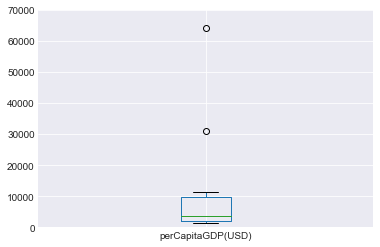

In [24]:
result1.boxplot(column='perCapitaGDP(USD)')
plt.ylim(0,70000)

From the boxlplot below, it is kind of obvious that the 2 outlier around 30k and 65K perCapitaGDP in USD while the quartile 1 - quartile 3 is around 2K and below 10K.

From the boxlplot below, we can see there is 2 outliers, Brunei at 30k USD while Singapore is at 64K USD. 
My thoughts for the 2 country as Brunei has rich oil and netural gas where they draws their wealth by exporting,
Singapore, however doesn't have any natural resources compared to most of the countries in SEA, where their 
perCapitaGDP is contributed from manufacturing industry (electronic,biomedical science,chemical) and their financial services
where Singapore ranked No.6 as global finance centres worldwide

# Question 1

My approach for this question is since I had some information of country who are vaccinating currently and what type of vaccines they are using, I assume that the remaining SEA population will equally distributed to either one out of the four vaccine.

First of all I sum the population of country(in thousands) that hasn't been vaccinated (the 7 country) and /4 since there are 4 vaccines.Then, I sum up the population of the country(vaccinated) for each type of vaccine with the population of country that hasn't been vaccinated and divide to the total population of SEA countries, from there we got a propotion for the types of vaccinated in SEA.

In [25]:
sea_population_without_vaccination = result1[result1['Vaccines'].isna()]
sea_population_without_vaccination = sea_population_without_vaccination['Population 2019 (Thousands)'] 
sea_population_without_vaccination = (sea_population_without_vaccination.sum()) / 4
sea_population_without_vaccination

78762.5

In [26]:
result1.dtypes

Country                         object
Vaccines                        object
Total_vaccinations               int64
People_fully_vaccinated          int64
GDP(MILLIONS USD)                int64
Population 2019 (Thousands)      int64
perCapitaGDP(USD)              float64
dtype: object

In [27]:
Total_populations = result1['Population 2019 (Thousands)']
Total_populations = (Total_populations.sum()) * 1000
Total_populations

662012000

In [28]:
Sinopharm = result1[result1['Vaccines'] =='Sinopharm/Beijing']['Population 2019 (Thousands)'] + sea_population_without_vaccination
Sinopharm = (Sinopharm * 1000) / Total_populations
Sinopharm = Sinopharm.sum()

In [29]:
Sinovac = result1[result1['Vaccines'] =='Sinovac']['Population 2019 (Thousands)'] + sea_population_without_vaccination
Sinovac = (Sinovac*1000) / Total_populations
Sinovac = Sinovac.sum()

In [30]:
Oxford = result1[result1['Vaccines'] =='Oxford/AstraZeneca']['Population 2019 (Thousands)'] + sea_population_without_vaccination
Oxford = (Oxford * 1000) /Total_populations
Oxford = Oxford.sum()

In [31]:
Pfizer = result1[result1['Vaccines'] =='Pfizer/BioNTech']['Population 2019 (Thousands)'] + sea_population_without_vaccination
Pfizer = Pfizer * 1000 / Total_populations
Pfizer = Pfizer.sum()

In [32]:
Total_vac_by_percentange = [Oxford,Sinovac,Pfizer,Sinopharm]
Total_vac_by_percentange_labels = ['Oxford/AstraZeneca','Sinovac','Pfizer/BioNTech','Sinopharm/Beijing']

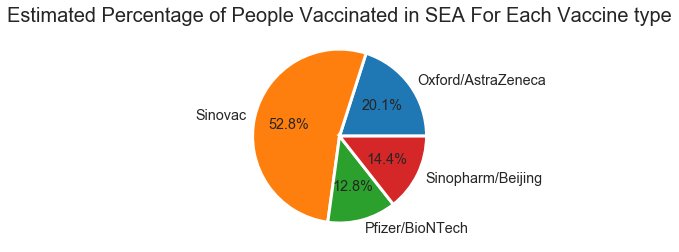

In [33]:
plt.pie(Total_vac_by_percentange, labels=Total_vac_by_percentange_labels, autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
plt.title('Estimated Percentage of People Vaccinated in SEA For Each Vaccine type',fontsize = 20)
plt.show()

From the pie chart above, we can observe that Sinovac has a relative huge propotion to the other vaccines type, which is due to Indonesia having approximately 40% of the SEA population, and all of them will be vaccinated with the Sinovac Vaccine.Hence this is why Sinovac has a such huge propotion.However, Pfizer/BioNTech has the least propotion as out of the 4 country that have confirmed the vaccine type, Singapore has the least population among 4 of them, in turns affecting that the propotion is least. However, I personally think this estimation will not be very accurate since some country out of the 7 vaccinated country might be using only ONE type of vaccines.

# Question 2

### Default Bar Chart

The problem with the default/basic bar chart is the number have too significant difference, and to fit the max number, it will have a bigger yscale where the population in thousands is not noticetable on the graph, hence for the Brunei and Timor-Leste there is not even a 'small bar'.

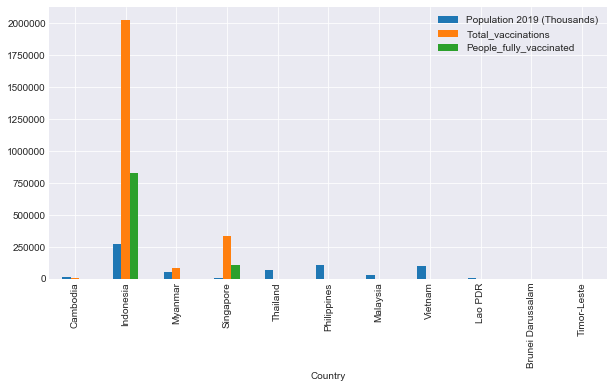

In [34]:
df1 = pd.DataFrame(result1 , columns =['Country','Population 2019 (Thousands)','Total_vaccinations','People_fully_vaccinated'])
df1.plot(x = 'Country' , y =['Population 2019 (Thousands)','Total_vaccinations','People_fully_vaccinated'],kind='bar',figsize=(10,5))
plt.show()

For the bar chart below even though I transform the population into the actual amount by multiplying 1000, even though Brunei and Timor-Leste is better noticeable than previous, however the vaccinations bar is not noticeable now.

In [35]:
result3 = result1.copy()
result3['Population 2019 (Thousands)'] = result3['Population 2019 (Thousands)'] * 1000
result3.rename(columns = {'Population 2019 (Thousands)' : 'Population 2019'},inplace = True)
result3

,Country,Vaccines,Total_vaccinations,People_fully_vaccinated,GDP(MILLIONS USD),Population 2019,perCapitaGDP(USD)
0,Cambodia,Sinopharm/Beijing,8171,0,27089,16487000,1643.052102
1,Indonesia,Sinovac,2022788,825650,1119191,270626000,4135.563471
2,Myanmar,Oxford/AstraZeneca,82823,0,76086,54045000,1407.826811
3,Singapore,Pfizer/BioNTech,329630,110000,372063,5804000,64104.583046
4,Thailand,NaN,0,0,543650,69626000,7808.146382
5,Philippines,NaN,0,0,376796,108117000,3485.076352
6,Malaysia,NaN,0,0,364702,31950000,11414.773083
7,Vietnam,NaN,0,0,261921,96462000,2715.276482
8,Lao PDR,NaN,0,0,18174,7169000,2535.081601
9,Brunei Darussalam,NaN,0,0,13469,433000,31106.235566


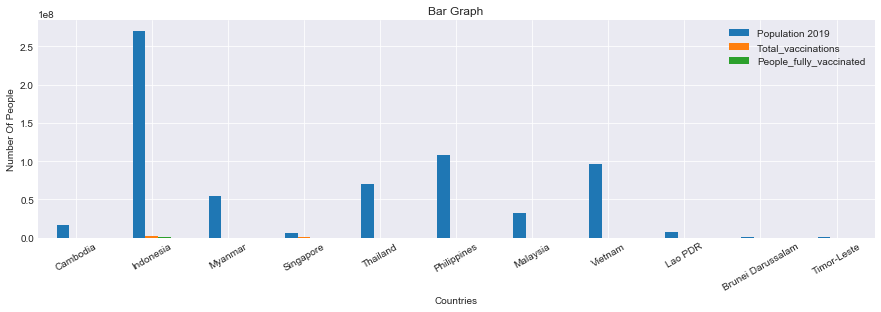

In [36]:
df = pd.DataFrame(result3 , columns =['Country','Population 2019','Total_vaccinations','People_fully_vaccinated'])
df.plot( x = 'Country' , y =['Population 2019','Total_vaccinations','People_fully_vaccinated'],kind='bar',figsize=(15,4))
plt.title('Bar Graph')
plt.ylabel('Number Of People')
plt.xlabel('Countries')
plt.xticks(rotation=30)
plt.show()

## More Appropriate Bar Graph

I changed the yscale from default (linear) to symlog so that I will got a range of exponentials from a very small number to a larger number.

Purely using this data is not appropriate as there are so many empty
entry on the both vaccination which make the graph meaningless as there aren't much can be visualized and also even thought the yscale is changed so the bar is visualisable for all the entries, it is still not simple enough for the end users to visualise in the form of exponential y-scaling.

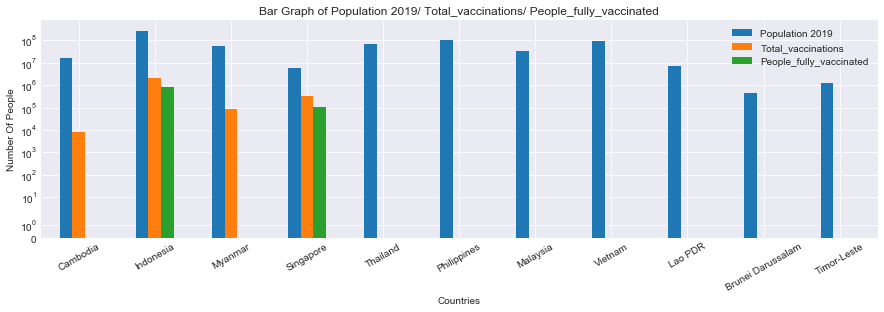

In [37]:
df = pd.DataFrame(result3 , columns =['Country','Population 2019','Total_vaccinations','People_fully_vaccinated'])
df.plot( x = 'Country' , y =['Population 2019','Total_vaccinations','People_fully_vaccinated'],kind='bar',figsize=(15,4))
plt.title('Bar Graph of Population 2019/ Total_vaccinations/ People_fully_vaccinated')
plt.yscale('symlog')
plt.ylabel('Number Of People')
plt.xlabel('Countries')
plt.xticks(rotation=30)
plt.show()

# Question 3 

In [38]:
vac = pd.read_csv("Vaccinations.csv", usecols = ["country","daily_vaccinations", "date"])
vac.head()

,country,date,daily_vaccinations
0,Albania,2021-01-10,NaN
1,Albania,2021-01-11,64.0
2,Albania,2021-01-12,64.0
3,Albania,2021-01-13,63.0
4,Albania,2021-01-14,66.0


In [39]:
SGP = vac[vac.country == 'Singapore']
SGP = SGP.reset_index()
SGP = SGP.drop('index',axis=1)
SGP['daily_vaccinations'] = SGP['daily_vaccinations'].fillna(0)
SGP.tail()

,country,date,daily_vaccinations
34,Singapore,2021-02-14,11446.0
35,Singapore,2021-02-15,11964.0
36,Singapore,2021-02-16,12482.0
37,Singapore,2021-02-17,13000.0
38,Singapore,2021-02-18,13000.0


In [40]:
SGP['date'] = pd.to_datetime(SGP['date'])
SGP['date'] =SGP['date'].dt.strftime('%m/%d')
SGP.dtypes

country                object
date                   object
daily_vaccinations    float64
dtype: object

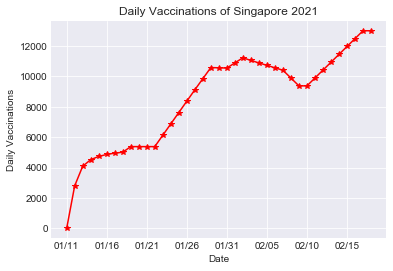

In [41]:
df1 = pd.DataFrame(SGP , columns =['date' , 'daily_vaccinations'])
plt.plot( df1['date'] , df1['daily_vaccinations'],marker='*',color='red')
plt.xlabel('Date')
plt.ylabel('Daily Vaccinations')
plt.title('Daily Vaccinations of Singapore 2021')
plt.xticks(df1.date[::5])
plt.show()

In [42]:
df2 = pd.DataFrame(SGP,columns = ['date' , 'daily_vaccinations'])
df2.tail()

,date,daily_vaccinations
34,02/14,11446.0
35,02/15,11964.0
36,02/16,12482.0
37,02/17,13000.0
38,02/18,13000.0


In [43]:
df2['daily_vaccinations_cumulative']= df2['daily_vaccinations'].cumsum(skipna=True)
df2.head()

,date,daily_vaccinations,daily_vaccinations_cumulative
0,01/11,0.0,0.0
1,01/12,2800.0,2800.0
2,01/13,4090.0,6890.0
3,01/14,4520.0,11410.0
4,01/15,4735.0,16145.0


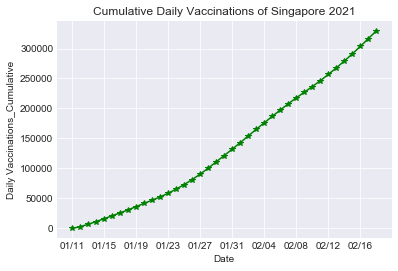

In [44]:
plt.plot( df2['date'] , df2['daily_vaccinations_cumulative'],color='green',marker='*')
plt.xlabel('Date')
plt.ylabel('Daily Vaccinations_Cumulative')
plt.title('Cumulative Daily Vaccinations of Singapore 2021')
plt.xticks(df2.date[::4],rotation=0)
plt.show()

For the both line graph above, both is useful depends in which way u wanted to visualize it. The first line graph showing the daily entries, while the second line graph showing the sum of all entries on previous day and the current day. 

Non-cumulative line graph:

- The non-cumulative line graph is a better way to visualizing for the daily  entries and keep track on which day has gradually increase/decrease.
- For example, we could see the daily vaccinations gradually increase from 22/1 

Cumulative line graph:

- The cumulative line graph is a better way to visualize the overall entries within the periods.
- It also useful in telling on our progression towards the milestone/target

# Conclusion 

At this moment, almost every country in the world is working on their vaccinations. We could forsee that by the next 12 months, country in South East Asia will be done with the vaccinations, and the pandemic is hopefully to be cure at 2021. Furthermore, the 4 vaccinations country excluding Singapore has a low perCapitaGDP, however they are also working on the vaccinations which tells us that the vaccinations status is not dependent on wealth, and everyone have a chance to get vaccinated.Moreover, the economics is now currently recovering to the previous pandemic state. The stock market however growing strong even thought is on pandemic, and also the crypto is doing well on the stock market.  